In [1]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing import image

Using TensorFlow backend.
/Users/reubenfeinman/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [59]:
def load_image_dataset(data_folder, target_size=(200, 200)):
    # First load the images
    imgs = []
    files = [file for file in os.listdir(data_folder) if file.endswith('png')]
    files = sorted(files)
    for file in files:
        img_path = os.path.join(data_folder, file)
        img = image.load_img(img_path, target_size=target_size,
                             interpolation='bicubic')
        imgs.append(image.img_to_array(img))
    imgs = np.asarray(imgs)
    imgs /= 255.
    # Now load the feature info
    feature_file = os.path.join(data_folder, 'data.csv')
    df = pd.read_csv(feature_file, index_col=0)
    #shapes = df['shape'].as_matrix()
    
    # Return both images and shape info
    return imgs, df

def load_image_dataset1(nb_categories, nb_exemplars, data_folder,
                        target_size=(200, 200)):
    # First load the images
    imgs = []
    files = [file for file in os.listdir(data_folder) if file.endswith('png')]
    files = sorted(files)
    for file in files:
        img_path = os.path.join(data_folder, file)
        img = image.load_img(img_path, target_size=target_size,
                             interpolation='bicubic')
        imgs.append(image.img_to_array(img))
    imgs = np.asarray(imgs)
    imgs /= 255.
    # Now load the feature info
    feature_file = os.path.join(data_folder, 'data.csv')
    df = pd.read_csv(feature_file, index_col=0)
    # Collect a subset of the data according to nb_categories, nb_exemplars
    ix = []
    for cat in range(nb_categories):
        ix_cat = df[df['shape'] == cat].index.tolist()
        ix_cat = ix_cat[:nb_exemplars]
        ix.extend(ix_cat)
    imgs = imgs[ix]
    df = df.iloc[ix]

    return imgs, df['shape'].as_matrix()

In [61]:
data_folder = '/Users/reubenfeinman/Dropbox/NYU/brenden_lake/learning-to-learn/data/images_ca0050_ex0014'
X, df = load_image_dataset1(10, 5, data_folder, target_size=(200, 200))

In [62]:
%matplotlib inline
import matplotlib.pylab as plt

In [63]:
def show_img(o, img):
    o.imshow(img)
    o.axis('off')

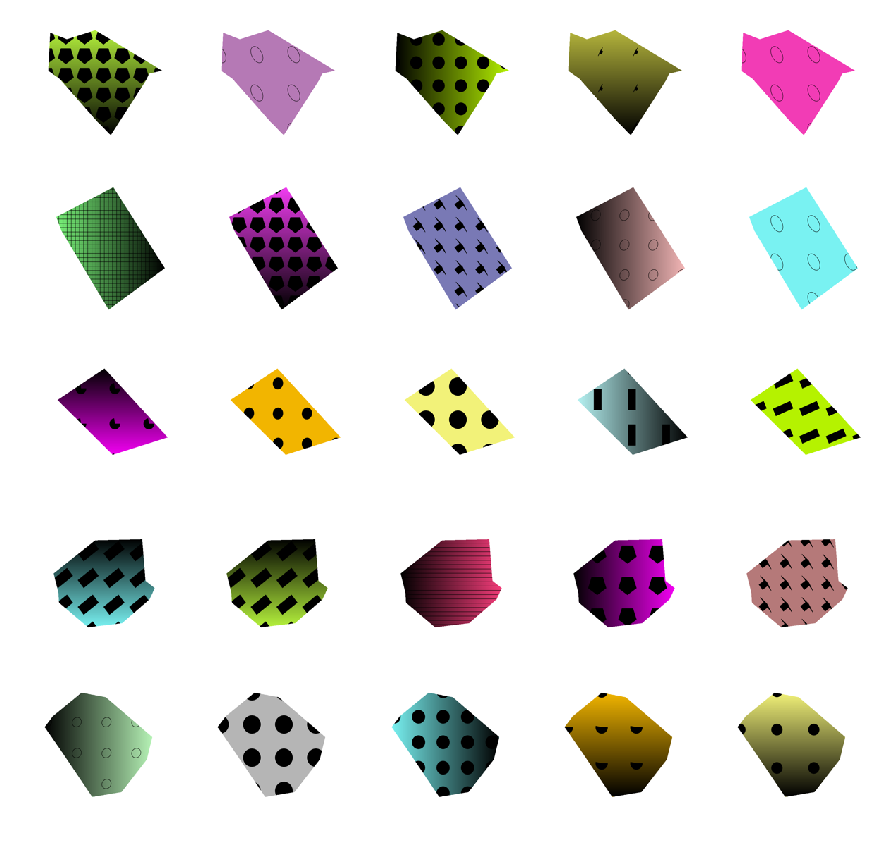

In [65]:
ncols=5
nrows=5
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,15))
for i in range(nrows):
    for j in range(ncols):
        show_img(axes[i,j], X[ncols*i+j])
plt.show()